### Импорт библиотек

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
from PIL import Image
plt.ion()

### Инициализация модели

In [2]:
# model = models.resnet50(pretrained=True)
# num_ftrs = model.fc.in_features
# model.fc = nn.Linear(num_ftrs, 4)
model = models.resnet50()
num_ftrs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 1024),
    nn.ReLU(inplace=True),
    nn.Linear(1024, 256),
    nn.ReLU(inplace=True),
    nn.Linear(256, 4)
)



In [3]:
sd = model.state_dict()
sd.update(torch.load('../model/resnet50_weights_trained.pth', map_location=torch.device('cpu')))
model.load_state_dict(sd)

<All keys matched successfully>

### Вспомогательная функция для трансформации изображения

In [4]:
transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

### Функция для визуализации результата

In [5]:
def show_res(input_image, model, transform):
    class_names = ['bad_quality', 'good_quality', 'outdoor', 'plan']
    model.eval()
    
    img = transform(input_image)
    outputs = model(img.unsqueeze(1).permute(1, 0, 2, 3))
    
    _, preds = torch.max(outputs, 1)
    
    res = class_names[preds]
    
    inp = img.numpy().transpose((1, 2, 0))

    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)

    plt.title('predicted: {}'.format(res))
    plt.imshow(inp) 

### Загрузка изображения

In [8]:
img = Image.open('/Users/a19329895/Downloads/data/train/plan/plan_1.jpg').convert("RGB")

### Результат

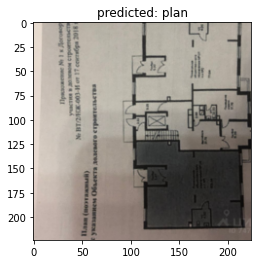

In [9]:
show_res(img, model, transform)